In [3]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from  matplotlib import ticker

import tkinter as tk
from tkinter import filedialog

In [4]:
class VLF_Data:
    """
    Within this class you can choose a folder that contains number of xlsx files
    and passing those files to a list, to open a spesific file, pleas use
    open_data function
    """
    
    def __init__(self):
        self.data = None
        self.spacing = None
        self.points = None
        
        print('Mari Mengolah VLF')
        print('dicoba dulu aja ya')
        
    def find_folder(self):
        """
        Choose the folder
        """
        
        root = tk.Tk()
        root.withdraw()
        root.attributes("-topmost", True)
        
        base_path = filedialog.askdirectory(parent=root)
        files = os.listdir(base_path)
        
        print(f'Found {len(files)} data')
        
        data_raw = []
        
        for item in files:
            file = os.path.join(base_path,item).replace("\\","/")
            data_raw.append(file)
            print(f'Reading file: {item}, completed')
            
        setattr(self, 'data', data_raw)
        return 'Done! :)'
    
    def open_data_1(self):
        """
        Open spesific file in the folder choosen, the function
        would automatically find the spacing between the, the output is the data itself
        and the spacing between points
        """
        data = self.data
        
        print(f'you have {len(data)} data(s)')
        for i in range(len(data)):
            x = data[i]
            print(f'data {i+1}: {x}')
        
        which = int(input('Which data you would open? (integer): '))
        while which > len(data):
            print(f'your input out of range, you just have {len(data)} data(s)')
            which = int(input('So, Which data you would open? (integer): '))
        
        the_data = data[which-1]
        the_data = pd.read_excel(the_data)
        
        space = the_data.iloc[1,3]
        setattr(self, 'spacing', space)
        
        spacing = self.spacing
        
        print(f'\nSpacing    : {spacing} m between each points in your line')
        print(f'Points     : {len(the_data)} points')
        print(f'Line lenght: {the_data.iloc[-1,3]} m')
        return the_data
    
    def open_data_2(self):
        """
        Open spesific file in the folder choosen, the function
        would automatically find how much your data points.
        """
        data = self.data
        
        print(f'you have {len(data)} data(s)')
        for i in range(len(data)):
            x = data[i]
            print(f'data {i+1}: {x}')
        
        which = int(input('Which data you would open? (integer): '))
        while which > len(data):
            print(f'your input out of range, you just have {len(data)} data(s)')
            which = int(input('So, Which data you would open? (integer): '))
        
        the_data = data[which-1]
        the_data = pd.read_excel(the_data)
        
        point = len(the_data)
        setattr(self, 'points', point)
        
        points = self.points
        
        print(f'\nData Points : you have {points} points')
        return the_data
        
def elevation(data, initial_elevation):
    """
    Find the elevation of each point in the line.
    Passed parameters is the dataframe and
    and the initial elevation
    """
    
    elevations = [initial_elevation]
    
    spacing = data.iloc[2, 3] - data.iloc[1, 3]
    sudut = data.iloc[1:, 4].to_list()
    
    initial_elev = initial_elevation
    for i,j in enumerate(sudut):
        initial_elev = initial_elev + (np.tan(np.radians(j))*spacing)
        elevations.append(initial_elev)
    
    data['Elevasi'] = elevations
    return data

def topo_correction(data):
    """
    to find dR, jarak topo, tilt topo, and elips topo.
    This process would reduce the data by 1,
    """
    
    jarak = data.iloc[:, 3].to_list()
    sudut = data.iloc[:, 4].to_list()
    tilt  = data.iloc[:, 5].to_list()
    elips = data.iloc[:, 6].to_list()
    
    dR, jarak_topo, tilt_topo, elips_topo = [], [], [], []
    
    for i in range(len(data)):
        try:
            dR.append((-6/5)*sudut[i+1])
            jarak_topo.append(np.average([jarak[i],jarak[i+1]]))
            elips_topo.append(np.average([elips[i],elips[i+1]]))
        except:
            dR.append('NaN')
            jarak_topo.append('NaN')
            elips_topo.append('NaN')
    
    for i in range(len(data)):
        try:
            tilt_topo.append(((tilt[i]+tilt[i+1])/2)+dR[i])
        except:
            tilt_topo.append('NaN')
            
    data['KT dR'] = dR
    data['KT Jarak Topo'] = jarak_topo
    data['KT Tilt Topo']  = tilt_topo
    data['KT Elips Topo'] = elips_topo
    
    return data

def filter_Moving_Average(data, nth_orde=None):
    """
    to aply smoothing, the parameter passed into function is the data and
    n-th order of filter (ex: 4rd orde --> orde=4),
    
    deafult for orde = 3
    """
    
    jarak_topo   = data.iloc[:, 13].to_list()
    tilt_topo    = data.iloc[:, 14].to_list()
    elips_topo   = data.iloc[:, 15].to_list()
    elevasi      = data.iloc[:, 11].to_list()
    elevasi[-1]  = 'NaN'
    
    
    jarak_MA, tilt_MA, elips_MA, elevasi_MA = [], [], [], []
    
    if nth_orde==None:
        
        b = 3
        print('Applying MA filter: orde-3')
        for i in range(len(data)):
            try:
                jarak_MA.append(np.average(jarak_topo[i:i+b]))
                tilt_MA.append(np.average(tilt_topo[i:i+b]))
                elips_MA.append(np.average(elips_topo[i:i+b]))
                elevasi_MA.append(np.average(elevasi[i:i+b]))
            except:
                jarak_MA.append('NaN')
                tilt_MA.append('NaN')
                elips_MA.append('NaN')
                elevasi_MA.append('NaN')
                
    else:
        
        b = nth_orde
        print(f'Applying MA filter: orde-{orde}')
        for i in range(len(data)):
            try:
                jarak_MA.append(np.average(jarak_topo[i:i+b]))
                tilt_MA.append(np.average(tilt_topo[i:i+b]))
                elips_MA.append(np.average(elips_topo[i:i+b]))
                elevasi_MA.append(np.average(elevasi[i:i+b]))
            except:
                jarak_MA.append('NaN')
                tilt_MA.append('NaN')
                elips_MA.append('NaN')
                elevasi_MA.append('NaN')
            
    data['MA Jarak Tilt'] = jarak_MA
    data['MA Tilt MA'] = tilt_MA
    data['MA Elips MA']  = elips_MA
    data['MA Elevasi MA'] = elevasi_MA
    
    return data

def fraser(data):
    """
    Applying fraser, parameter passed into function is the data that Moving
    Average filter is have been applied to. 
    """
    
    jarak_MA = data.iloc[:, 16].to_list()
    tilt_MA = data.iloc[:, 17].to_list()
    
    jarak_fraser, tilt_fraser= [], []
    
    for i in range(len(data)):
        b = 4
        try:
            jarak_fraser.append(np.average(jarak_MA[i:i+b]))
            first  = tilt_MA[i+(b-(b))]
            second = tilt_MA[i+(b-(b-1))]
            third  = tilt_MA[i+(b-(b-2))]
            fourth = tilt_MA[i+(b-(b-3))]
            tilt_fraser.append((-first-second+third+fourth)/4)
        except:
            jarak_fraser.append('NaN')
            tilt_fraser.append('NaN')
            
    data['Fraser Jarak'] = jarak_fraser
    data['Fraser Tilt']  = tilt_fraser
    
    return data

def is_there_NaN(data):
    """
    Checking data for RAE
    """
    
    last = data.iloc[:, -1].to_list()
    check = []
    
    for i, j in enumerate(last):
        if isinstance(j, float):
            check.append(j)
    
    if len(check)>5:
        return True
    else:
        return False
    

def RAE(data):
    """
    Applying RAE until the data can't handle it
    """
    ask = int(input('RAE brp ni?: '))
    
    if is_there_NaN(data):
        print('Your data is fine, you can continue to apply RAE {}')

        jarak_MA = data.iloc[:, 16].to_list()
        tilt_MA = data.iloc[:, 17].to_list()

        x, y, RAE = [], [], []

        for i in range(len(data)):
            if ask == 10:
                parameter   = 3
                batas_awal  = parameter-1
                batas_akhir = len(data)-parameter
                pengali     = 1
                kedalaman   = -ask
            if ask == 20:
                parameter   = 6
                batas_awal  = parameter-1
                batas_akhir = len(data)-parameter
                pengali     = 2
                kedalaman   = -ask
            if ask == 30:
                parameter   = 9
                batas_awal  = parameter-1
                batas_akhir = len(data)-parameter
                pengali     = 3
                kedalaman   = -ask
            if ask == 40:
                parameter   = 12
                batas_awal  = parameter-1
                batas_akhir = len(data)-parameter
                pengali     = 4
                kedalaman   = -ask
            if ask == 50:
                parameter   = 15
                batas_awal  = parameter-1
                batas_akhir = len(data)-parameter
                pengali     = 5
                kedalaman   = -ask
            if ask == 60:
                parameter   = 18
                batas_awal  = parameter-1
                batas_akhir = len(data)-parameter
                pengali     = 6
                kedalaman   = -ask
            if ask == 70:
                parameter   = 21
                batas_awal  = parameter-1
                batas_akhir = len(data)-parameter
                pengali     = 7
                kedalaman   = -ask
            if ask == 80:
                parameter   = 24
                batas_awal  = parameter-1
                batas_akhir = len(data)-parameter
                pengali     = 8
                kedalaman   = -ask
            try:
                if batas_awal < i < batas_akhir:
                    a = -0.102*tilt_MA[i-(parameter-(0*pengali))]
                    b =  0.059*tilt_MA[i-(parameter-(1*pengali))]
                    c = -0.561*tilt_MA[i-(parameter-(2*pengali))]
                    d =  0.561*tilt_MA[i+(parameter-(2*pengali))]
                    e = -0.059*tilt_MA[i+(parameter-(1*pengali))]
                    f =  0.102*tilt_MA[i+(parameter-(0*pengali))]

                    x.append(jarak_MA[i])
                    y.append(kedalaman)
                    RAE.append(a+b+c+d+e+f)
                else:
                    x.append('NaN')
                    y.append('NaN')
                    RAE.append('NaN')
            except:
                x.append('NaN')
                y.append('NaN')
                RAE.append('NaN')

        data[f'X{ask}'] = x
        data[f'Y{ask}'] = y
        data[f'RAE{ask}'] = RAE

        return data
    
    else:
        print('You can not do the RAE anymore, your data is to small')
        return data


def All_in_one(data):
    
    initial_elevation = int(input('What is the initial elevation?: '))
    a = elevation(data, initial_elevation)
    
    b = topo_correction(a)
    
    orde_degree = int(input('What orde degree you want do apply on Moving Average Filter?: ')) 
    if orde_degree > 3:
        c = filter_Moving_Average(b, orde_degree)
    else:
        pass
    c = filter_Moving_Average(b)
    d = fraser(c)
    e10 = RAE(d)
    e20 = RAE(e10)
    e30 = RAE(e20)
    e40 = RAE(e30)
    e50 = RAE(e40)
    e60 = RAE(e50)
    
    return e60

def plot(data):
    
    jarak  = data.iloc[:, 3].to_list()
    tilt   = data.iloc[:, 5].to_list()
    ellips = data.iloc[:, 6].to_list()

    jarak_topo  = data.iloc[:, 13].to_list()[:-1]
    tilt_topo   = data.iloc[:, 14].to_list()[:-1]
    ellips_topo = data.iloc[:, 15].to_list()[:-1]
    
    jarak_MA  = data.iloc[:, 16].to_list()[:-3]
    tilt_MA   = data.iloc[:, 17].to_list()[:-3]
    ellips_MA = data.iloc[:, 18].to_list()[:-3]

    jarak_fraser  = data.iloc[:, 20].to_list()[:-6]
    tilt_fraser   = data.iloc[:, 21].to_list()[:-6]

    fig, (ax, ax1, ax2, ax3) = plt.subplots(4,1,figsize=(12,12))

    ax.plot(jarak,tilt,linestyle='--',marker='D',color='r',zorder=6, label= 'Tilt')
    ax.plot(jarak,ellips,linestyle='--',marker='s',color='b',zorder=6, label='Ellpis')
    ax.grid(zorder=1)
    ax.set_ylabel('Tilt & Ellips')
    ax.set_xlabel('Jarak')
    ax.set_title('Tilt & Ellips vs Jarak')
    ax.set_xlim(-2,401)

    ax1.plot(jarak_topo,tilt_topo,linestyle='--',marker='D',color='r',zorder=3)
    ax1.plot(jarak_topo,ellips_topo,linestyle='--',marker='s',color='b',zorder=3)
    ax1.grid(zorder=1)
    ax1.set_ylabel('Tilt & Ellips Topografi')
    ax1.set_xlabel('Jarak')
    ax1.set_title('Tilt & Ellips vs Jarak Topografi')
    ax1.set_xlim(-2,401)
    
    ax2.plot(jarak_MA,tilt_MA,linestyle='--',marker='D',color='r',zorder=6, label= 'Tilt')
    ax2.plot(jarak_MA,ellips_MA,linestyle='--',marker='s',color='b',zorder=6, label='Ellpis')
    ax2.grid(zorder=1)
    ax2.set_ylabel('Tilt & Ellips Moving Average')
    ax2.set_xlabel('Jarak')
    ax2.set_title('Tilt & Ellips vs Jarak Moving Average')
    ax2.set_xlim(-2,401)

    ax3.plot(jarak_fraser,tilt_fraser,linestyle='--',marker='D',color='r',zorder=3)
    ax3.grid(zorder=1)
    ax3.set_ylabel('Tilt Fraser')
    ax3.set_xlabel('Jarak')
    ax3.set_title('Tilt vs Jarak Fraser')
    ax3.set_xlim(-2,401)

    ax.legend(bbox_to_anchor =(0.225, 0.95), ncol = 2)
    fig.tight_layout()
    plt.show()
    
def prepared_data(data):
    df = data.iloc[:, -18:]

    x   = df.iloc[:,0].to_list() + df.iloc[:,3].to_list() + df.iloc[:,6].to_list()+ df.iloc[:,9].to_list()+ df.iloc[:,12].to_list()+ df.iloc[:,15].to_list()
    y   = df.iloc[:,1].to_list() + df.iloc[:,4].to_list() + df.iloc[:,7].to_list()+ df.iloc[:,10].to_list()+ df.iloc[:,13].to_list()+ df.iloc[:,16].to_list()
    rae = df.iloc[:,2].to_list() + df.iloc[:,5].to_list() + df.iloc[:,8].to_list()+ df.iloc[:,11].to_list()+ df.iloc[:,14].to_list()+ df.iloc[:,17].to_list()
    elevasi  = data.iloc[:,19].to_list() + data.iloc[:,19].to_list() + data.iloc[:,19].to_list() + data.iloc[:,19].to_list() + data.iloc[:,19].to_list() + data.iloc[:,19].to_list() 
    easting  = data.iloc[:,1].to_list() + data.iloc[:,1].to_list() + data.iloc[:,1].to_list() + data.iloc[:,1].to_list() + data.iloc[:,1].to_list() + data.iloc[:,1].to_list()
    northing = data.iloc[:,2].to_list() + data.iloc[:,2].to_list() + data.iloc[:,2].to_list() + data.iloc[:,2].to_list() + data.iloc[:,2].to_list() + data.iloc[:,2].to_list()
    
    X,Y,RAE,Elevasi,Easting,Northing = [],[],[],[],[],[]

    for i in range(len(x)):
        if x[i] != 'NaN':
            X.append(x[i])
            Y.append(y[i])
            RAE.append(rae[i])
            Elevasi.append(elevasi[i])
            Easting.append(easting[i])
            Northing.append(northing[i])
    
    final = {
        'X'  : X,
        'Y'  : Y,
        'RAE': RAE,
        'Elevasi'  : Elevasi,
        'Easting'  : Easting,
        'Northing' : Northing}
    
    a = pd.DataFrame.from_dict(final)
    return a

def max_min(list_of_data):
    """
    This function would take max RAE and min RAE from the input (list that contains
    each lines data)
    
    output: RAE max and RAE min from each data
    """
    data = list_of_data[0]
    
    a = 0
    if a<len(list_of_data):
        for i, item in enumerate(list_of_data):
            try:
                data = data.append(list_of_data[i+1])
                a += 1
            except:
                pass
    else:
        pass
    
    max_RAE = data['RAE'].max()
    min_RAE = data['RAE'].min()
    
    return max_RAE, min_RAE

def normalization(data, max_RAE, min_RAE):
    data['Nomalization'] = (((data['RAE']-min_RAE)*2)/(max_RAE - min_RAE))-1
    data['Plot Elevation'] = data['Elevasi'] + data['Y']
    
    rae_max = data['Nomalization'].max()
    rae_min = data['Nomalization'].min()
    
    if rae_max == 1 and rae_min == -1:
        print(f"Checking. your maximum Normalized-RAE now is: {rae_max}")
        print(f"Checking. your minimum Normalized-RAE now is: {rae_min}")
        return data
    else:
        print('educate yourself!')
        return data
    
def save(data):
    name = input("Mau dinamain apaan ni file? (g usah pake extension): ")
    final = pd.ExcelWriter(f'{name}.xlsx')
    data.to_excel(final, 'marks', index=False)
    final.save()
    return "Coba cek folder dimana klean nyimpan file ipynb ni! ;) selamat makan ya ges ya"
      

In [5]:
test1 = VLF_Data()
test1.find_folder()
data_olah_3 = test1.open_data_1()

Mari Mengolah VLF
dicoba dulu aja ya
Found 3 data
Reading file: data_olah.xlsx, completed
Reading file: data_olah_2.xlsx, completed
Reading file: data_olah_3.xlsx, completed
you have 3 data(s)
data 1: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/Data/data_olah.xlsx
data 2: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/Data/data_olah_2.xlsx
data 3: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/Data/data_olah_3.xlsx
Which data you would open? (integer): 3

Spacing    : 10 m between each points in your line
Points     : 42 points
Line lenght: 400 m


In [6]:
rae60 = All_in_one(data_olah_3)

What is the initial elevation?: 461
What orde degree you want do apply on Moving Average Filter?: 3
Applying MA filter: orde-3
RAE brp ni?: 10
Your data is fine, you can continue to apply RAE {}
RAE brp ni?: 20
Your data is fine, you can continue to apply RAE {}
RAE brp ni?: 30
Your data is fine, you can continue to apply RAE {}
RAE brp ni?: 40
Your data is fine, you can continue to apply RAE {}
RAE brp ni?: 50
Your data is fine, you can continue to apply RAE {}
RAE brp ni?: 60
Your data is fine, you can continue to apply RAE {}


In [7]:
rae60

,Nama Titik,Easting,Northing,Jarak,Sudut,Tilt,Ellips,H hor,H ver,Arah,...,RAE30,X40,Y40,RAE40,X50,Y50,RAE50,X60,Y60,RAE60
0,L3-000,512678.3725,9120578.405,0,-14,-14.00,7,9.79,3.90,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L3-001,512690.9652,9120575.251,10,-8,3.00,7,18.90,6.15,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,L3-002,512704.1822,9120576.853,20,-9,-20.00,-1,12.30,6.17,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L3-003,512719.2015,9120575.651,30,-12,-16.00,6,13.60,5.67,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,L3-004,512731.4172,9120576.252,40,-14,-44.00,9,9.67,22.50,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,L3-005,512745.2350,9120574.249,50,-29,-14.00,4,13.60,8.29,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,L3-006,512760.0541,9120577.654,60,-40,-10.00,2,10.20,3.02,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,L3-007,512776.0747,9120574.249,70,-26,-29.00,-13,13.40,6.10,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,L3-008,512793.8977,9120573.849,80,-34,-43.00,-13,7.28,8.10,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,L3-009,512804.7116,9120575.851,90,-30,-5.00,-3,21.80,8.17,2,...,3.486533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


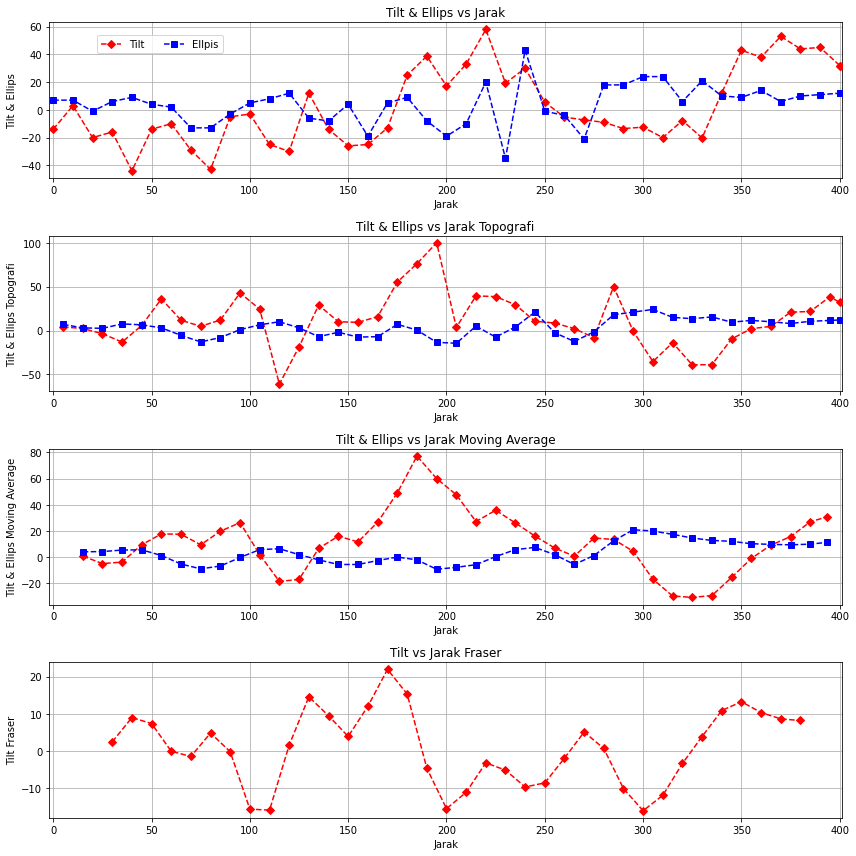

In [8]:
plot(rae60)

In [9]:
convert = prepared_data(rae60)
convert

,X,Y,RAE,Elevasi,Easting,Northing
0,45.0,-10,11.617633,452.375298,512719.2015,9120575.651
1,55.0,-10,6.211867,446.899509,512731.4172,9120576.252
2,65.0,-10,-2.217867,440.629038,512745.2350,9120574.249
3,75.0,-10,0.057267,433.957902,512760.0541,9120577.654
4,85.0,-10,6.694233,428.159265,512776.0747,9120574.249
...,...,...,...,...,...,...
103,235.0,-50,-32.797042,364.367614,512943.8908,9120572.647
104,245.0,-50,-28.796125,364.484872,512954.7047,9120572.848
105,195.0,-60,3.968767,374.535472,512903.4387,9120573.849
106,205.0,-60,-2.325842,367.333188,512912.4503,9120574.049


In [10]:
save(convert)

Mau dinamain apaan ni file? (g usah pake extension): m


'Coba cek folder dimana klean nyimpan file ipynb ni! ;) selamat makan ya ges ya'

In [12]:
test2 = VLF_Data()
test2.find_folder()

Mari Mengolah VLF
dicoba dulu aja ya
Found 28 data
Reading file: .ipynb_checkpoints, completed
Reading file: a60.xlsx, completed
Reading file: akhirnya selesai.xlsx, completed
Reading file: Data, completed
Reading file: data1.xlsx, completed
Reading file: H1 VLF.jpg, completed
Reading file: Langsung_RAE10.xlsx, completed
Reading file: Latihan Olah VLF.xlsx, completed
Reading file: Latihan Pengolahan VLF.xls, completed
Reading file: Latihan Pengolahan VLF.xlsx, completed
Reading file: lintasan1_normalized.xlsx, completed
Reading file: m.xlsx, completed
Reading file: no elev.grd, completed
Reading file: No Elevation.grd, completed
Reading file: outputRAE30.xlsx, completed
Reading file: outputRAE40.xlsx, completed
Reading file: Pengolahan VLF 2.ipynb, completed
Reading file: Pengolahan VLF.ipynb, completed
Reading file: Plot Surfer.dat, completed
Reading file: rae60_1.xlsx, completed
Reading file: siap ngolah.xlsx, completed
Reading file: terserah.xlsx, completed
Reading file: ~$akhirnya 

'Done! :)'

In [13]:
coba = test2.open_data_2()

you have 28 data(s)
data 1: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/.ipynb_checkpoints
data 2: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/a60.xlsx
data 3: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/akhirnya selesai.xlsx
data 4: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/Data
data 5: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/data1.xlsx
data 6: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/H1 VLF.jpg
data 7: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/Langsung_RAE10.xlsx
data 8: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/Latihan Olah VLF.xlsx
data 9: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/Latihan Pengolahan VLF.xls
data 10: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/Latihan Pengolahan VLF.xlsx
data 11: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/lintasan1_normalized.xlsx
data 12: D:/COLLEGE/2022-Field Camp 19/Latihan Kelompok 7/VLF/m.xlsx
data 13: D:/COLLEGE/2022-Field Camp 19

In [14]:
max_RAE, min_RAE = max_min([coba])
max_RAE, min_RAE

(52.58254166666667, -42.6501)

In [15]:
coba = normalization(coba, max_RAE, min_RAE)
coba

Checking. your maximum Normalized-RAE now is: 1.0
Checking. your minimum Normalized-RAE now is: -1.0


,X,Y,RAE,Elevasi,Easting,Northing,Nomalization,Plot Elevation
0,45,-10,11.617633,452.375298,512719.2015,9120575.651,0.139688,442.375298
1,55,-10,6.211867,446.899509,512731.4172,9120576.252,0.026160,436.899509
2,65,-10,-2.217867,440.629038,512745.2350,9120574.249,-0.150874,430.629038
3,75,-10,0.057267,433.957902,512760.0541,9120577.654,-0.103094,423.957902
4,85,-10,6.694233,428.159265,512776.0747,9120574.249,0.036290,418.159265
...,...,...,...,...,...,...,...,...
103,235,-50,-32.797042,364.367614,512943.8908,9120572.647,-0.793074,314.367614
104,245,-50,-28.796125,364.484872,512954.7047,9120572.848,-0.709050,314.484872
105,195,-60,3.968767,374.535472,512903.4387,9120573.849,-0.020948,314.535472
106,205,-60,-2.325842,367.333188,512912.4503,9120574.049,-0.153142,307.333188


In [16]:
save(coba)

Mau dinamain apaan ni file? (g usah pake extension): mm


'Coba cek folder dimana klean nyimpan file ipynb ni! ;) selamat makan ya ges ya'